In [1]:
import numpy as np
import matrixprofile as mp
from matplotlib import pyplot as plt

In [2]:
np.random.seed(666)
x = np.linspace(0, 10 * 2 * np.pi, 1000)

In [3]:
y = [0] * 10

In [4]:
y[0] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[1] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[2] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[3] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[4] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[5] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[6] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[7] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[8] = np.sin(x) + np.random.normal(0, 0.5, 1000)
y[9] = np.sin(x) + np.random.normal(0, 0.5, 1000)

In [5]:
y_mean = np.mean(y, axis=0)
y_mean

array([ 0.04440677,  0.13324175,  0.06092095,  0.21516925,  0.27687792,
        0.61818031,  0.53957825,  0.37727716,  0.58275794,  0.0772909 ,
        0.64844786,  0.54209524,  0.65079948,  0.6869203 ,  0.62258291,
        0.65009061,  0.83145723,  0.62715379,  0.85686559,  1.02492964,
        1.00854694,  0.94605554,  0.72335333,  1.17304524,  0.91460974,
        1.04216107,  0.88119822,  0.78322916,  0.78606148,  1.10656103,
        0.45416426,  0.94577344,  0.97854923,  0.65266856,  0.86480073,
        0.71371022,  0.71526904,  0.79186485,  0.95354377,  0.57324679,
        0.34319994,  0.51785862,  0.77021639,  0.61425186, -0.00980924,
       -0.01096855,  0.06157476, -0.06224911,  0.09567631,  0.17029162,
       -0.09805315, -0.08473295, -0.12800239, -0.42916661,  0.07736346,
       -0.19344428, -0.33512311, -0.5314923 , -0.29034381, -0.3180945 ,
       -0.80833889, -0.51138619, -0.70497261, -0.82056509, -0.67740038,
       -0.70020642, -0.51116139, -0.59024868, -1.17483469, -0.98

In [6]:
y[1][500:600] = y[1][500:600] + np.random.normal(0, 0.5, 100)
y[2][200:300] = np.sin(1.1 * x[200:300]) + np.random.normal(0, 0.5, 100)

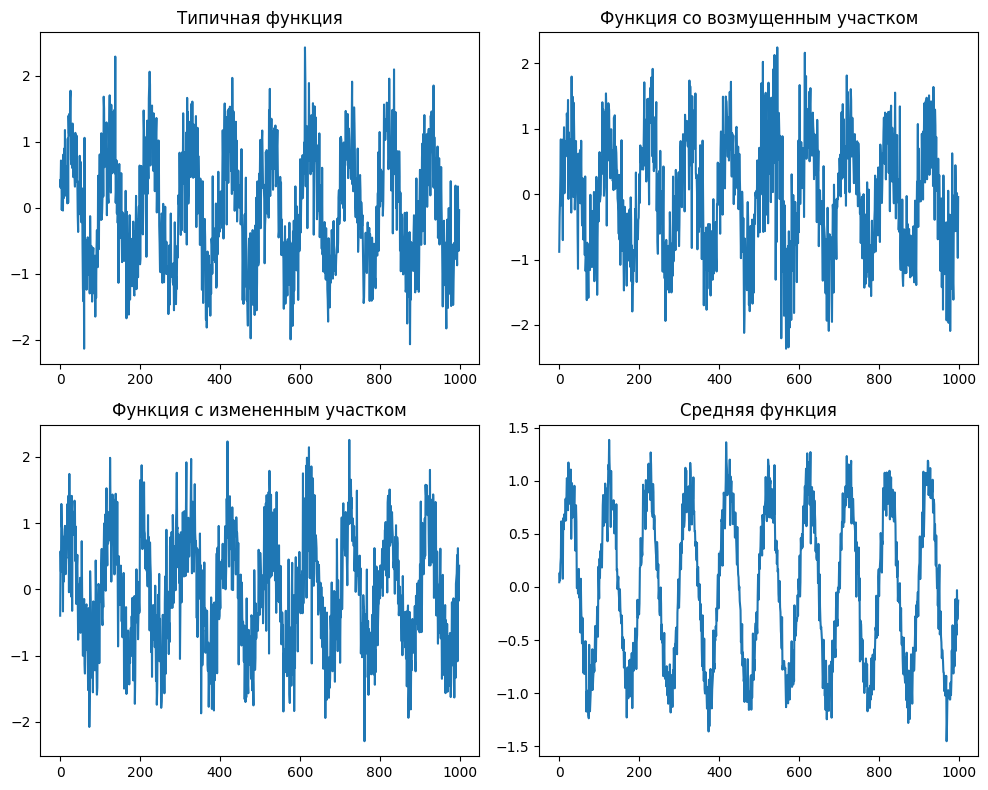

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(y[0])
axs[0, 1].plot(y[1])
axs[1, 0].plot(y[2])
axs[1, 1].plot(y_mean)

axs[0, 0].set_title('Типичная функция')
axs[0, 1].set_title('Функция со возмущенным участком')
axs[1, 0].set_title('Функция с измененным участком')
axs[1, 1].set_title('Средняя функция')

plt.tight_layout()

In [8]:
def get_distance(ts_1, ts_2):
    return np.sqrt(np.sum(np.square(ts_1 - ts_2)))

In [9]:
def mean_profile(ts_list, index, window_size):
        subseq_num = len(ts_list[index]) - window_size + 1
        mean_ts = np.mean(ts_list, axis=0)
        prof = []
        for j in range(subseq_num):
            subseq = ts_list[index][j : j + window_size - 1]
            min_dist = np.min([get_distance(subseq, mean_ts[k : k + window_size - 1]) for k in range(len(mean_ts) - window_size + 1)])           
            prof.append(min_dist)
        return prof

In [10]:
def mean_profile2(ts_list, index, window_size):
        subseq_num = len(ts_list[index]) - window_size + 1
        mean_ts = np.mean(ts_list[:i] + ts_list[i+1:], axis=0)
        prof = []
        for j in range(subseq_num):
            subseq = ts_list[index][j : j + window_size - 1]
            min_dist = np.min([get_distance(subseq, mean_ts[k : k + window_size - 1]) for k in range(len(mean_ts) - window_size + 1)])           
            prof.append(min_dist)
        return prof

In [11]:
def multiprofile(ts_list, window_size):
    fig, axs = plt.subplots(2, int(np.ceil((len(ts_list)+1)/2)), figsize=(25, 15))
    mean_ts = np.mean(ts_list, axis=0)
    axs[0, 0].plot(mp.compute(mean_ts, windows=window_size)['mp'])
    axs[0, 0].set_title('Средняя функция')
    mean_len = len(mean_ts)
    for i in range(len(ts_list)):
        subseq_num = len(ts_list[i]) - window_size + 1
        profile_i = []
        for j in range(subseq_num):
            subseq = ts_list[i][j : j + window_size - 1]
            min_dist = np.min([get_distance(subseq, mean_ts[k : k + window_size - 1]) for k in range(mean_len - window_size + 1)])           
            profile_i.append(min_dist)
        axs[(i + 1) % 2, int((i + 1) / 2)].plot(profile_i)
        axs[(i + 1) % 2, int((i + 1) / 2)].set_title(f'Ряд {i + 1}')
    plt.tight_layout()
        

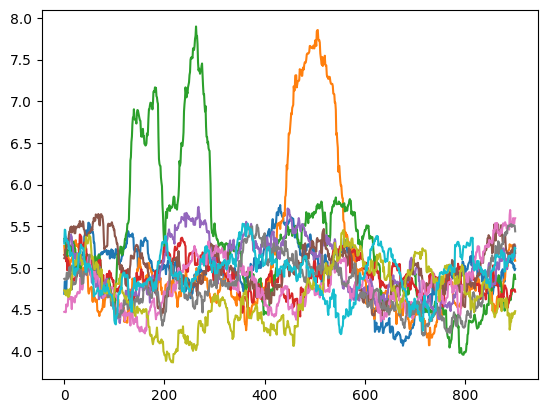

In [12]:
for i in range(10):
    plt.plot(mean_profile2(y, i, 100))

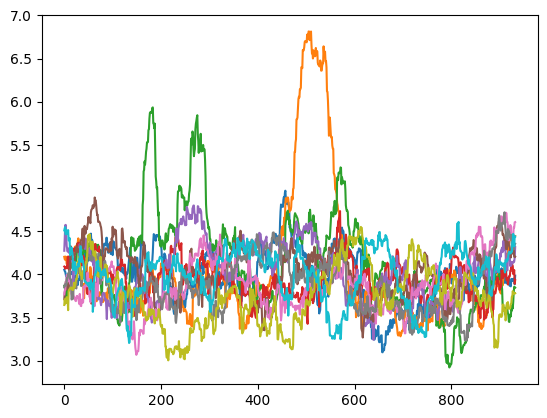

In [13]:
for i in range(10):
    plt.plot(mean_profile2(y, i, 68))

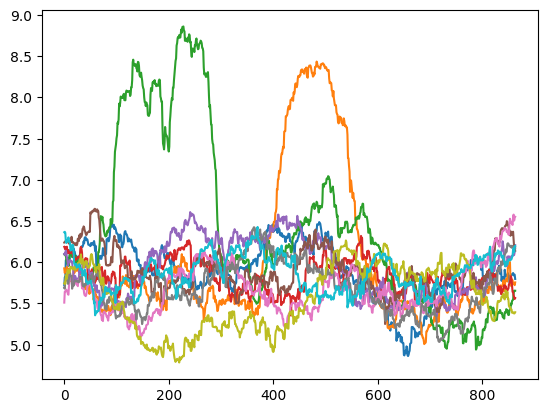

In [14]:
for i in range(10):
    plt.plot(mean_profile2(y, i, 137))